In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [64]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
%matplotlib inline

In [66]:
df = pd.read_csv("Obesity_data.csv")
df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [67]:
df.shape

(2111, 17)

In [68]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [70]:
df.shape

(2111, 17)

In [71]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [72]:
df.Age.unique()

array([21.      , 23.      , 27.      , ..., 22.524036, 24.361936,
       23.664709])

In [73]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [74]:
df.Height.unique()

array([1.62    , 1.52    , 1.8     , ..., 1.752206, 1.73945 , 1.738836])

In [75]:
df.Weight.unique()

array([ 64.      ,  56.      ,  77.      , ..., 133.689352, 133.346641,
       133.472641])

In [76]:
df.CALC.unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [77]:
df.FAVC.unique()

array(['no', 'yes'], dtype=object)

In [78]:
df.FCVC.unique()

array([2.      , 3.      , 1.      , 2.450218, 2.880161, 2.00876 ,
       2.596579, 2.591439, 2.392665, 1.123939, 2.027574, 2.658112,
       2.88626 , 2.714447, 2.750715, 1.4925  , 2.205439, 2.059138,
       2.310423, 2.823179, 2.052932, 2.596364, 2.767731, 2.815157,
       2.737762, 2.568063, 2.524428, 2.971574, 1.0816  , 1.270448,
       1.344854, 2.959658, 2.725282, 2.844607, 2.44004 , 2.432302,
       2.592247, 2.449267, 2.929889, 2.015258, 1.031149, 1.592183,
       1.21498 , 1.522001, 2.703436, 2.362918, 2.14084 , 2.5596  ,
       2.336044, 1.813234, 2.724285, 2.71897 , 1.133844, 1.757466,
       2.979383, 2.204914, 2.927218, 2.88853 , 2.890535, 2.530066,
       2.241606, 1.003566, 2.652779, 2.897899, 2.483979, 2.945967,
       2.478891, 2.784464, 1.005578, 2.938031, 2.842102, 1.889199,
       2.943749, 2.33998 , 1.950742, 2.277436, 2.371338, 2.984425,
       2.977018, 2.663421, 2.753752, 2.318355, 2.594653, 2.886157,
       2.967853, 2.619835, 1.053534, 2.530233, 2.8813  , 2.824

In [79]:
df.NCP.unique()

array([3.      , 1.      , 4.      , 3.28926 , 3.995147, 1.72626 ,
       2.581015, 1.600812, 1.73762 , 1.10548 , 2.0846  , 1.894384,
       2.857787, 3.765526, 3.285167, 3.691226, 3.156153, 1.07976 ,
       3.559841, 3.891994, 3.240578, 3.904858, 3.11158 , 3.590039,
       2.057935, 3.558637, 2.000986, 3.821168, 3.897078, 3.092116,
       3.286431, 3.592415, 3.754599, 3.566082, 3.725797, 3.520555,
       3.731212, 1.259803, 1.273128, 3.304123, 3.647154, 3.300666,
       3.535016, 1.717608, 2.884479, 3.626815, 1.473088, 3.16645 ,
       3.494849, 2.99321 , 2.127797, 3.90779 , 3.699594, 3.179995,
       1.075553, 3.238258, 3.804944, 1.630846, 3.762778, 3.371832,
       2.705445, 3.34175 , 2.217651, 2.893778, 3.502604, 3.998766,
       3.193671, 1.69608 , 2.812377, 1.612747, 1.082304, 1.882158,
       2.326233, 1.989398, 1.735493, 2.974568, 3.715118, 3.489918,
       3.378859, 3.263201, 3.994588, 3.24934 , 3.087544, 1.163666,
       3.409363, 3.281391, 3.98525 , 3.207071, 3.471536, 3.488

In [80]:
df.SCC.unique()

array(['no', 'yes'], dtype=object)

In [81]:
df.SMOKE.unique()

array(['no', 'yes'], dtype=object)

In [82]:
df.CH2O.unique()

array([2.      , 3.      , 1.      , ..., 2.054193, 2.852339, 2.863513])

In [83]:
df.family_history_with_overweight.unique()

array(['yes', 'no'], dtype=object)

In [84]:
df.FAF.unique()

array([0.      , 3.      , 2.      , ..., 1.414209, 1.139107, 1.026452])

In [85]:
df.TUE.unique()

array([1.      , 0.      , 2.      , ..., 0.646288, 0.586035, 0.714137])

In [86]:
df.CAEC.unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [87]:
df.MTRANS.unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [88]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [89]:
df1 = df.drop("TUE", axis='columns')
df1.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [90]:
df1.shape

(2111, 16)

In [91]:
new_column_names = {'CALC': 'ALCHOL CONSUMPTION', 'FAVC': 'H CALORIC FOOD', 'FCVC': 'VEGETABLES', 'NCP': 'MAIN MEALS', 'SCC': 'CALORIES MEASURE', 'CH2O': 'WATER', 'FAF': 'EXERCISE', 'CAEC': 'SNACKS', 'MTRANS': 'TRANSPORTATION', 'NObeyesdad': 'OBESITY LEVEL'}
df1.rename(columns=new_column_names, inplace=True)
df1.head()

,Age,Gender,Height,Weight,ALCHOL CONSUMPTION,H CALORIC FOOD,VEGETABLES,MAIN MEALS,CALORIES MEASURE,SMOKE,WATER,family_history_with_overweight,EXERCISE,SNACKS,TRANSPORTATION,OBESITY LEVEL
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [92]:
columns_to_convert = ["MAIN MEALS","VEGETABLES","EXERCISE"]
df1[columns_to_convert] = df1[columns_to_convert].astype(int)

In [93]:
df1["MAIN MEALS"].unique()

array([3, 1, 4, 2])

In [94]:
df1["VEGETABLES"].unique()

array([2, 3, 1])

In [95]:
df1["EXERCISE"].unique()

array([0, 3, 2, 1])

Text(0.5, 1.0, 'MAIN MEALS - KDE')

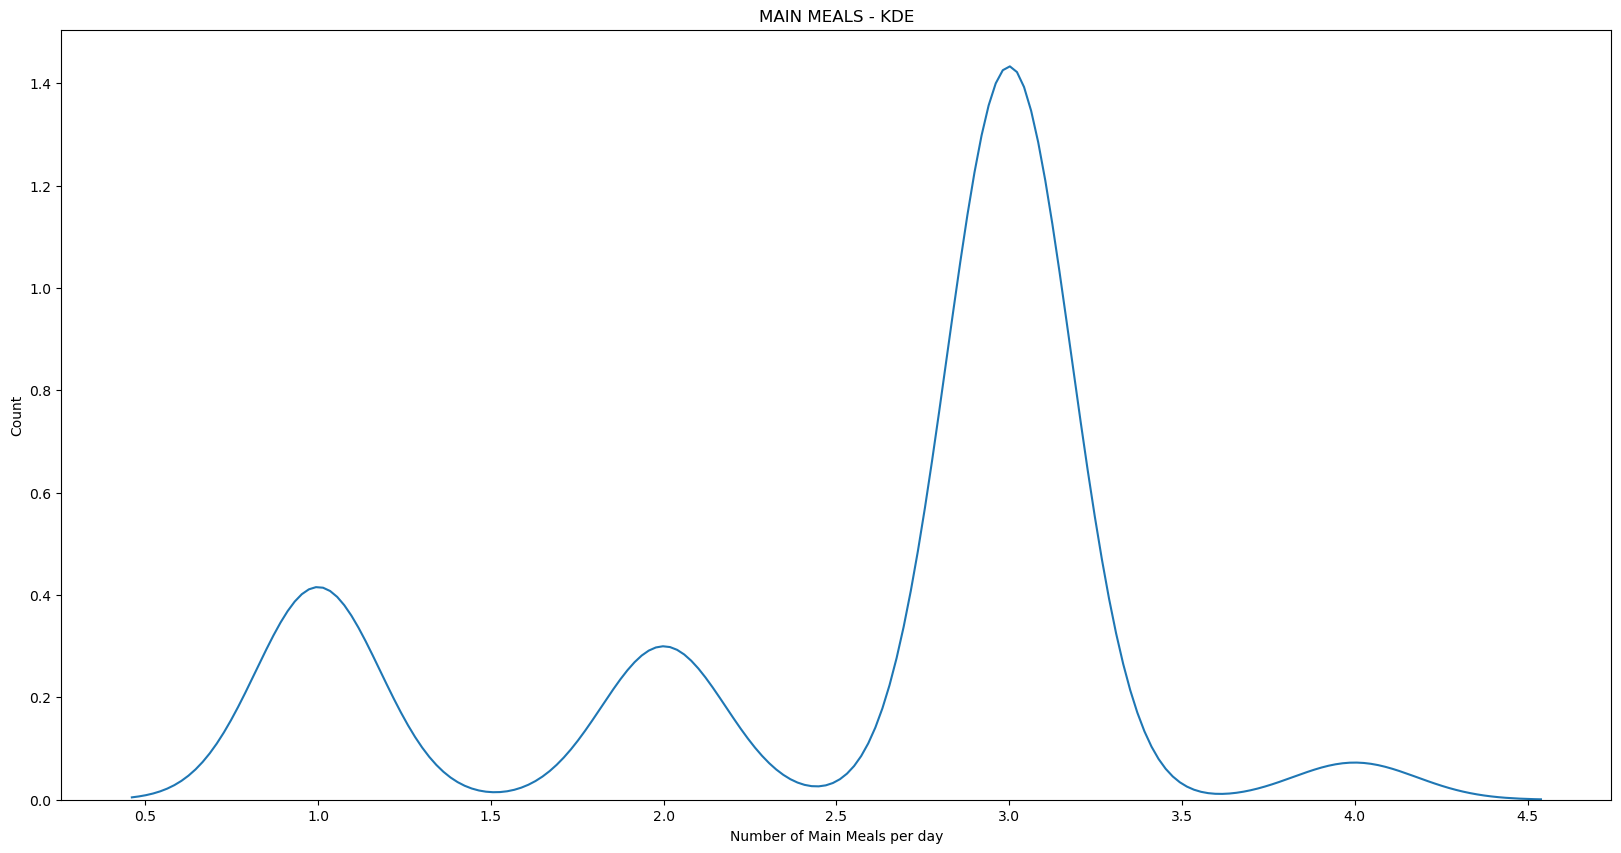

In [96]:
sns.kdeplot(df1["MAIN MEALS"])
plt.xlabel('Number of Main Meals per day')
plt.ylabel('Count')
plt.title('MAIN MEALS - KDE')

Text(0, 0.5, 'Count')

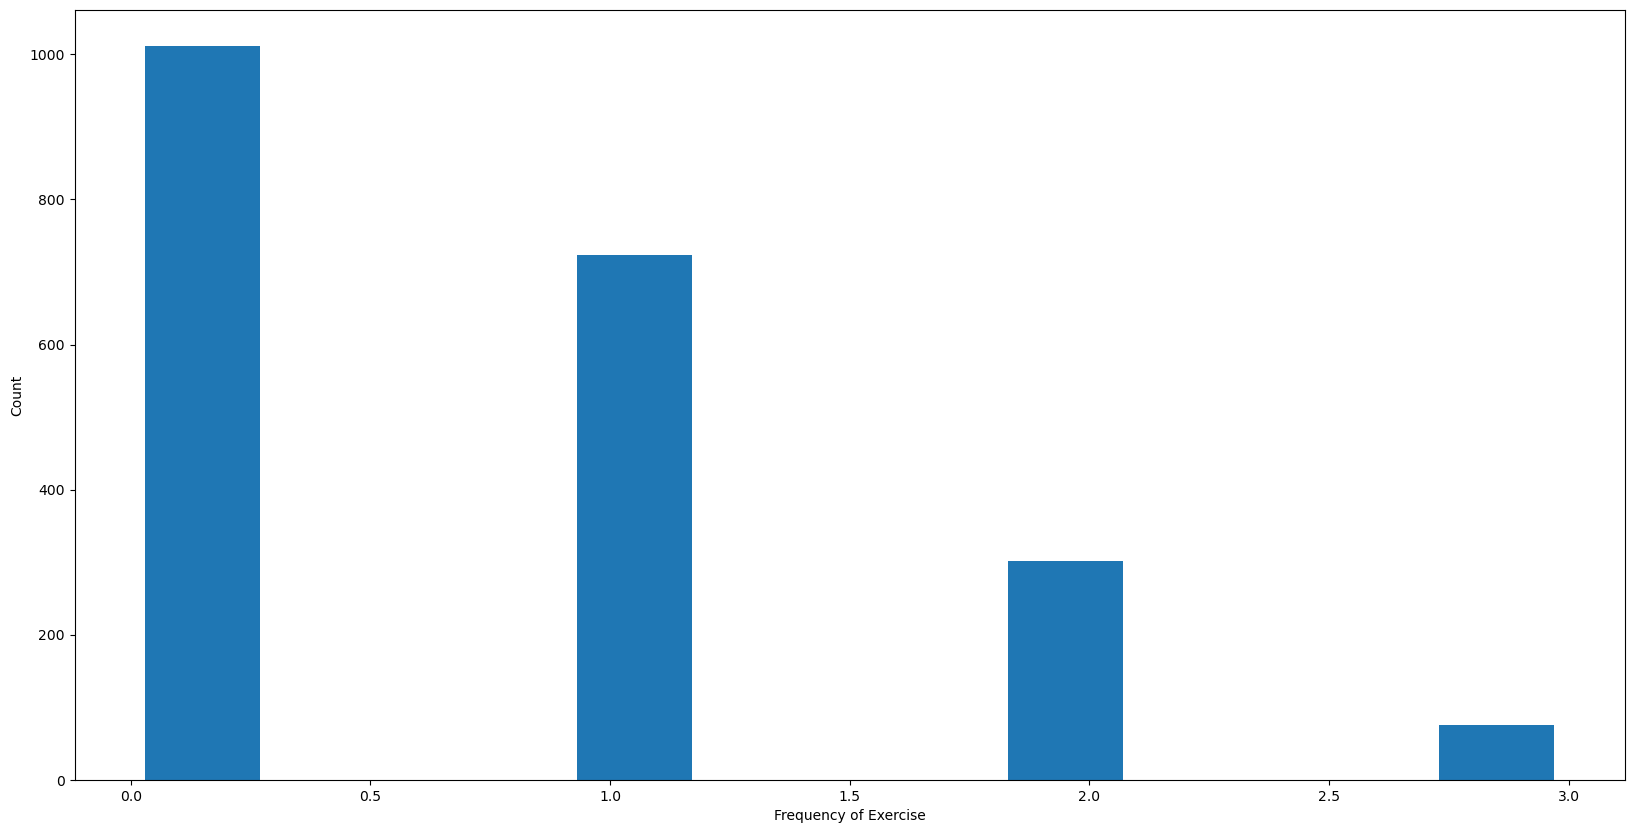

In [97]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df1["EXERCISE"], rwidth=0.8)
plt.xlabel("Frequency of Exercise")
plt.ylabel("Count")

In [98]:
le = LabelEncoder()
categorical_columns = ["Gender","TRANSPORTATION","ALCHOL CONSUMPTION","SNACKS","SMOKE","CALORIES MEASURE","family_history_with_overweight","H CALORIC FOOD",]
for col in categorical_columns:
    df1[col] = le.fit_transform(df1[col])

In [99]:
df1.head(10)

,Age,Gender,Height,Weight,ALCHOL CONSUMPTION,H CALORIC FOOD,VEGETABLES,MAIN MEALS,CALORIES MEASURE,SMOKE,WATER,family_history_with_overweight,EXERCISE,SNACKS,TRANSPORTATION,OBESITY LEVEL
0,21.0,0,1.62,64.0,3,0,2,3,0,0,2.0,1,0,2,3,Normal_Weight
1,21.0,0,1.52,56.0,2,0,3,3,1,1,3.0,1,3,2,3,Normal_Weight
2,23.0,1,1.80,77.0,1,0,2,3,0,0,2.0,1,2,2,3,Normal_Weight
3,27.0,1,1.80,87.0,1,0,3,3,0,0,2.0,0,2,2,4,Overweight_Level_I
4,22.0,1,1.78,89.8,2,0,2,1,0,0,2.0,0,0,2,3,Overweight_Level_II
5,29.0,1,1.62,53.0,2,1,2,3,0,0,2.0,0,0,2,0,Normal_Weight
6,23.0,0,1.50,55.0,2,1,3,3,0,0,2.0,1,1,2,2,Normal_Weight
7,22.0,1,1.64,53.0,2,0,2,3,0,0,2.0,0,3,2,3,Normal_Weight
8,24.0,1,1.78,64.0,1,1,3,3,0,0,2.0,1,1,2,3,Normal_Weight
9,22.0,1,1.72,68.0,3,1,2,3,0,0,2.0,1,1,2,3,Normal_Weight


In [100]:
X = df1.drop("OBESITY LEVEL", axis= "columns")
y = df1["OBESITY LEVEL"]

In [101]:
X.head()

,Age,Gender,Height,Weight,ALCHOL CONSUMPTION,H CALORIC FOOD,VEGETABLES,MAIN MEALS,CALORIES MEASURE,SMOKE,WATER,family_history_with_overweight,EXERCISE,SNACKS,TRANSPORTATION
0,21.0,0,1.62,64.0,3,0,2,3,0,0,2.0,1,0,2,3
1,21.0,0,1.52,56.0,2,0,3,3,1,1,3.0,1,3,2,3
2,23.0,1,1.80,77.0,1,0,2,3,0,0,2.0,1,2,2,3
3,27.0,1,1.80,87.0,1,0,3,3,0,0,2.0,0,2,2,4
4,22.0,1,1.78,89.8,2,0,2,1,0,0,2.0,0,0,2,3


In [102]:
y.head()

0          Normal_Weight
1          Normal_Weight
2          Normal_Weight
3     Overweight_Level_I
4    Overweight_Level_II
Name: OBESITY LEVEL, dtype: object

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [104]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100)
rf_classifier.fit(X_train,y_train)
prediction = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9507575757575758


In [105]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, prediction))

Confusion Matrix:
[[66  1  0  0  0  0  0]
 [ 2 62  0  0  0  2  2]
 [ 0  2 74  0  0  0  1]
 [ 0  0  0 71  0  0  0]
 [ 0  1  0  0 90  0  0]
 [ 0  8  0  0  0 76  4]
 [ 0  3  0  0  0  0 63]]


In [106]:
print("Classification Report:")
print(classification_report(y_test, prediction))

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.99      0.98        67
      Normal_Weight       0.81      0.91      0.86        68
     Obesity_Type_I       1.00      0.96      0.98        77
    Obesity_Type_II       1.00      1.00      1.00        71
   Obesity_Type_III       1.00      0.99      0.99        91
 Overweight_Level_I       0.97      0.86      0.92        88
Overweight_Level_II       0.90      0.95      0.93        66

           accuracy                           0.95       528
          macro avg       0.95      0.95      0.95       528
       weighted avg       0.95      0.95      0.95       528



In [107]:
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))

Cross Validation Scores: [0.71631206 0.98578199 0.97393365 0.98341232 0.99052133]
Mean Cross Validation Score: 0.929992269167423


In [108]:
def predict_obesity_level(model, features):
    features_arr = np.array(features).reshape(1, -1)
    obesity_level = model.predict(features_arr)
    return obesity_level[0]

In [109]:
features = [20.8, 1, 1.694567, 73.22, 0, 3, 3, 3, 0, 0, 4.06, 0, 3, 1, 3]

In [110]:
predicted_obesity_level = predict_obesity_level(rf_classifier, features)
print("Predicted Obesity Level:", predicted_obesity_level)

Predicted Obesity Level: Normal_Weight


In [111]:
results=pd.DataFrame(columns=['Actual','Predicted'])
results['Actual']=y_test
results['Predicted']=prediction
results=results.reset_index()
results['id']=results.index
results.head()

,index,Actual,Predicted,id
0,2054,Obesity_Type_III,Obesity_Type_III,0
1,1152,Overweight_Level_II,Overweight_Level_II,1
2,1883,Obesity_Type_III,Obesity_Type_III,2
3,248,Normal_Weight,Normal_Weight,3
4,375,Overweight_Level_II,Overweight_Level_II,4


[]

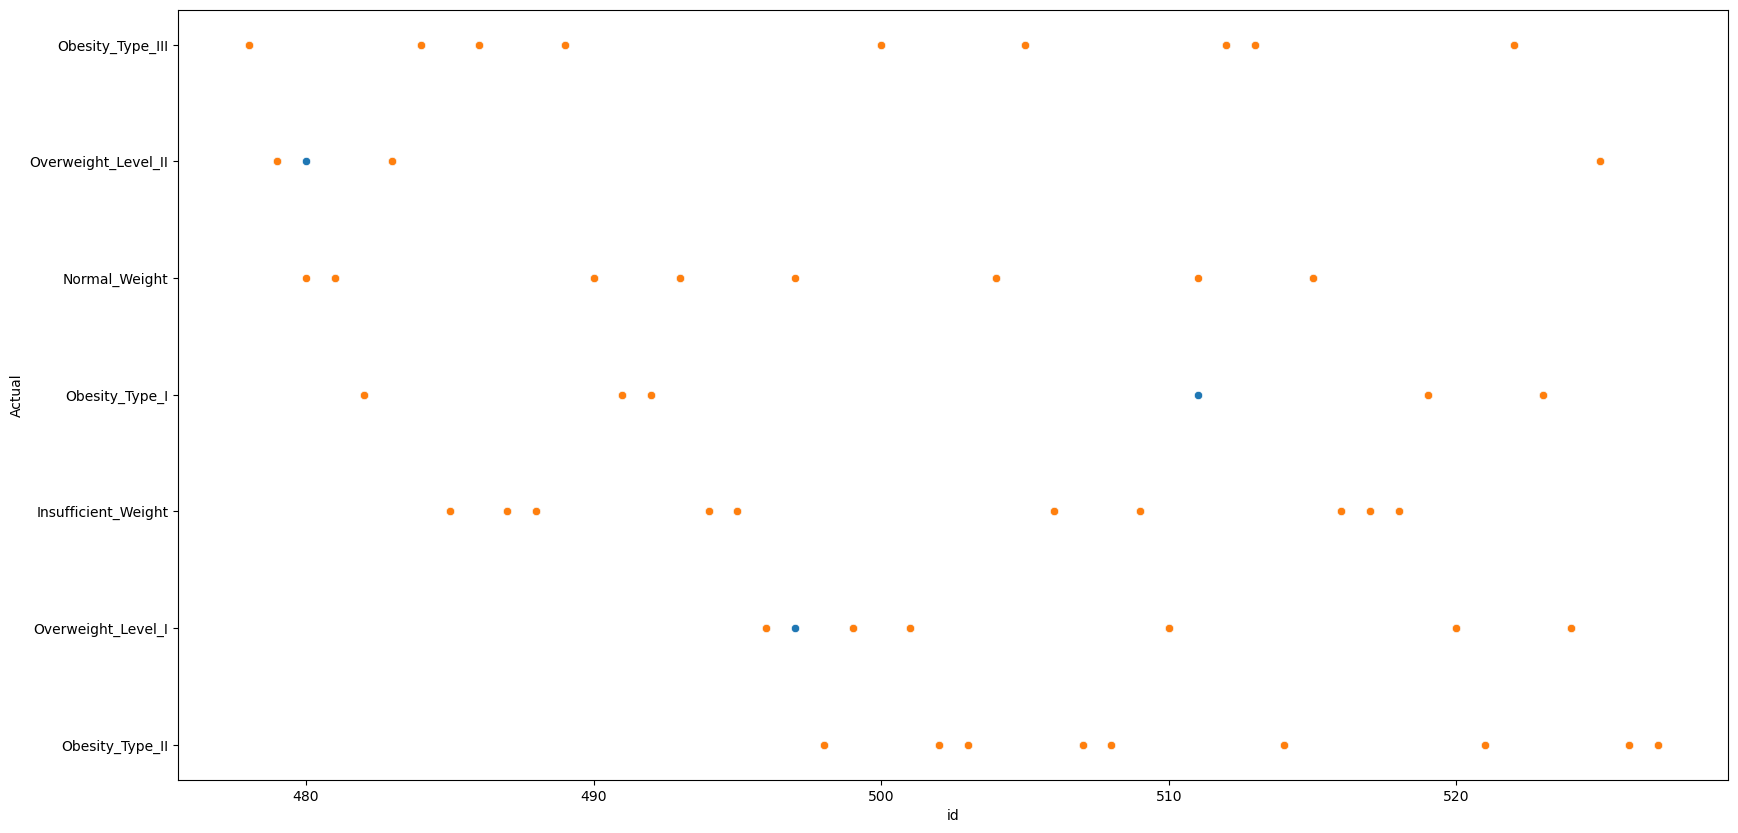

In [113]:
sns.scatterplot(x='id',y='Actual', data=results.tail(50))
sns.scatterplot(x='id',y='Predicted', data=results.tail(50))
plt.plot()